 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [76]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [85]:
# Reading whale returns
whale_csv = Path("./Resources/whale_returns.csv")
whale_data = pd.read_csv(whale_csv)
whale_data.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [86]:
# Count nulls
whale_data.isnull()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,False,True,True,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1055,False,False,False,False,False
1056,False,False,False,False,False
1057,False,False,False,False,False
1058,False,False,False,False,False


In [87]:
# Drop nulls
whale_data.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [92]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_path)
algo_data

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [93]:
# Count nulls
algo_data.isnull().sum().sum()

6

In [94]:
# Drop nulls
algo_data.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [95]:
# Reading S&P 500 Closing Prices
sp_path = Path("./Resources/sp500_history.csv")
sp_data = pd.read_csv(sp_path)
sp_data

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [96]:
# Check Data Types
df = pd.DataFrame(sp_data)
print(df.dtypes)

Date     object
Close    object
dtype: object


In [97]:
# Fix Data Types
df['Close'] = df['Close'].str.replace('$', '')

print(df)

           Date    Close
0     23-Apr-19  2933.68
1     22-Apr-19  2907.97
2     18-Apr-19  2905.03
3     17-Apr-19  2900.45
4     16-Apr-19  2907.06
...         ...      ...
1644   5-Oct-12  1460.93
1645   4-Oct-12  1461.40
1646   3-Oct-12  1450.99
1647   2-Oct-12  1445.75
1648   1-Oct-12  1444.49

[1649 rows x 2 columns]


In [98]:
df['Close'] = df['Close'].astype('float')

print(df.dtypes)
print(df)

Date      object
Close    float64
dtype: object
           Date    Close
0     23-Apr-19  2933.68
1     22-Apr-19  2907.97
2     18-Apr-19  2905.03
3     17-Apr-19  2900.45
4     16-Apr-19  2907.06
...         ...      ...
1644   5-Oct-12  1460.93
1645   4-Oct-12  1461.40
1646   3-Oct-12  1450.99
1647   2-Oct-12  1445.75
1648   1-Oct-12  1444.49

[1649 rows x 2 columns]


In [99]:
df['Date'] = pd.to_datetime(df['Date'])

print(df.dtypes)
print(df)

Date     datetime64[ns]
Close           float64
dtype: object
           Date    Close
0    2019-04-23  2933.68
1    2019-04-22  2907.97
2    2019-04-18  2905.03
3    2019-04-17  2900.45
4    2019-04-16  2907.06
...         ...      ...
1644 2012-10-05  1460.93
1645 2012-10-04  1461.40
1646 2012-10-03  1450.99
1647 2012-10-02  1445.75
1648 2012-10-01  1444.49

[1649 rows x 2 columns]


/var/folders/4j/vy9pwxkd0x5dm3xz7jvkz1bh0000gn/T/ipykernel_94606/3190650188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [100]:
# Calculate Daily Returns
df['Daily_Return'] = df['Close'].pct_change() * 100
print(df)

           Date    Close  Daily_Return
0    2019-04-23  2933.68           NaN
1    2019-04-22  2907.97     -0.876374
2    2019-04-18  2905.03     -0.101101
3    2019-04-17  2900.45     -0.157658
4    2019-04-16  2907.06      0.227896
...         ...      ...           ...
1644 2012-10-05  1460.93      0.346869
1645 2012-10-04  1461.40      0.032171
1646 2012-10-03  1450.99     -0.712331
1647 2012-10-02  1445.75     -0.361133
1648 2012-10-01  1444.49     -0.087152

[1649 rows x 3 columns]


In [101]:
# Drop nulls
sp_data.dropna()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [102]:
# Rename `Close` Column to be specific to this portfolio.
df.rename(columns={'Close': 'Price'}, inplace=True)
print("\nDataFrame after renaming:")
print(df)


DataFrame after renaming:
           Date    Price  Daily_Return
0    2019-04-23  2933.68           NaN
1    2019-04-22  2907.97     -0.876374
2    2019-04-18  2905.03     -0.101101
3    2019-04-17  2900.45     -0.157658
4    2019-04-16  2907.06      0.227896
...         ...      ...           ...
1644 2012-10-05  1460.93      0.346869
1645 2012-10-04  1461.40      0.032171
1646 2012-10-03  1450.99     -0.712331
1647 2012-10-02  1445.75     -0.361133
1648 2012-10-01  1444.49     -0.087152

[1649 rows x 3 columns]


## Combine Whale, Algorithmic, and S&P 500 Returns

In [104]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combine = pd.concat([whale_data, algo_data, sp_data], axis = 'columns', join = 'inner')
combine

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Date,Close
0,2015-03-02,NaN,NaN,NaN,NaN,2014-05-28,0.001745,NaN,23-Apr-19,$2933.68
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,2014-05-29,0.003978,NaN,22-Apr-19,$2907.97
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,2014-05-30,0.004464,NaN,18-Apr-19,$2905.03
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,2014-06-02,0.005692,NaN,17-Apr-19,$2900.45
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,2014-06-03,0.005292,NaN,16-Apr-19,$2907.06
...,...,...,...,...,...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,2018-08-03,-0.003656,0.002817,11-Feb-15,$2068.53
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434,2018-08-06,0.000529,0.000285,10-Feb-15,$2068.59
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223,2018-08-07,0.000207,-0.001330,9-Feb-15,$2046.74
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702,2018-08-08,0.008429,-0.001812,6-Feb-15,$2055.47


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: >

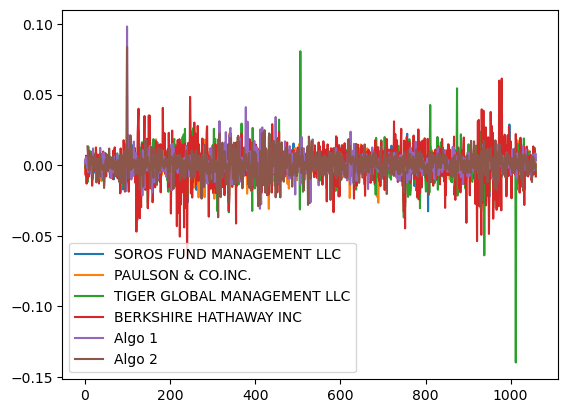

In [105]:
# Plot daily returns of all portfolios
combine.plot()

#### Calculate and Plot cumulative returns.

In [109]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

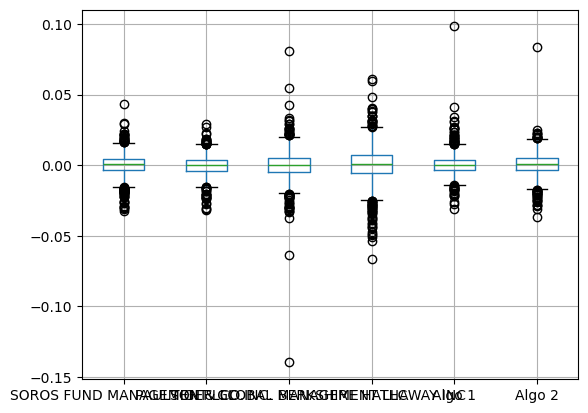

In [108]:
# Box plot to visually show risk
combine.boxplot()

### Calculate Standard Deviations

In [120]:
# Calculate the daily standard deviations of all portfolios
daily_std = combine.std()
daily_std

TypeError: could not convert string to float: '2015-03-02'

### Determine which portfolios are riskier than the S&P 500

In [121]:
# Calculate the daily standard deviation of S&P 500
daily_std = sp_data.std()
daily_std

# Determine which portfolios are riskier than the S&P 500


TypeError: could not convert string to float: '23-Apr-19'

### Calculate the Annualized Standard Deviation

In [122]:
# Calculate the annualized standard deviation (252 trading days)
combine.rolling(window = 252).std()

DataError: Cannot aggregate non-numeric type: object

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [123]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combine.rolling(window = 21).std()

# Plot the rolling standard deviation


DataError: Cannot aggregate non-numeric type: object

### Calculate and plot the correlation

In [127]:
# Calculate the correlation
correlation = combine.corr()
correlation.head()

# Display de correlation matrix


ValueError: could not convert string to float: '2015-03-02'

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!